### import libraries 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

# To suppress all warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(color_codes=True)

### Define functions for downstream use

In [57]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
        

## Load Data ##

We load data using the "read_csv" method in the pandas library

In [58]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

we view the data to have a grasp of what it contains, the columns in it, the first few rows, random middle rows and the last few rows.

In [59]:
client_df.head (3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [60]:
client_df.tail(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [61]:
client_df. sample(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
13253,d2af6191e89cb88b9d8c2444f2f82e00,lmkebamcaaclubfxadlmueccxoimlema,2364,0,0,2013-05-28,2016-05-28,2015-11-01,2015-06-02,352.39,...,f,0.00,19.20,19.20,1,35.09,3,ldkssxwpmemidmecebumciepifcamkci,10.392,0
10817,f4571ce4c1e568f60bf61ab370719265,usilxuppasemubllopkaafesmlibmsdf,4913,0,376,2010-03-04,2016-03-04,2010-03-04,2015-03-09,509.97,...,f,37.83,39.14,39.14,1,64.41,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0
6017,28872e9d67144a3bba2d55dce6cbacdb,MISSING,4262,0,0,2010-10-28,2016-10-28,2010-10-28,2015-10-29,534.10,...,f,0.00,18.08,18.08,1,55.30,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.350,0


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
13253,d2af6191e89cb88b9d8c2444f2f82e00,lmkebamcaaclubfxadlmueccxoimlema,2364,0,0,2013-05-28,2016-05-28,2015-11-01,2015-06-02,352.39,...,f,0.00,19.20,19.20,1,35.09,3,ldkssxwpmemidmecebumciepifcamkci,10.392,0
10817,f4571ce4c1e568f60bf61ab370719265,usilxuppasemubllopkaafesmlibmsdf,4913,0,376,2010-03-04,2016-03-04,2010-03-04,2015-03-09,509.97,...,f,37.83,39.14,39.14,1,64.41,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0
6017,28872e9d67144a3bba2d55dce6cbacdb,MISSING,4262,0,0,2010-10-28,2016-10-28,2010-10-28,2015-10-29,534.10,...,f,0.00,18.08,18.08,1,55.30,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.350,0


In [62]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [63]:
price_df.tail(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


##### Rename some columns for easy undesratnding

In [64]:
client_df.rename (columns = {"id": "company", "activity_new" : "cat_comp_activity","channel_sales" : "sales_channel",
                             "cons_12m" : "cons_elect_12m", "forecast_price_energy_off_peak":"fcast_enrgy_price_period1",
                            "forecast_price_energy_peak" : "fcast_enrgy_price_period2", "forecast_price_pow_off_peak" : "fcast_pwr_price_period1",
                            "imp_cons" : "current_paid_sub", "num_years_antig" : "customer_no_yrs", "origin_up":"elect_campain_code",
                            }, inplace = True);



price_df.rename (columns = {"id" : "company", "price_date" : "ref_date", "price_off_peak_var" : "energy_price_period1", 
                             "price_peak_var" : "energy_price_period2", "price_mid_peak_var" : "energy_price_period3", 
                             "price_off_peak_fix":"pwr_price_period1","price_peak_fix" : "pwr_price_period2", "price_mid_peak_fix" : "pwr_price_period3",
                           }, inplace = True)
client_df.head(1)
price_df.head(1)

,company,ref_date,energy_price_period1,energy_price_period2,energy_price_period3,pwr_price_period1,pwr_price_period2,pwr_price_period3
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0


,company,ref_date,energy_price_period1,energy_price_period2,energy_price_period3,pwr_price_period1,pwr_price_period2,pwr_price_period3
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0


 ## Descriptive statistics of data
#### Dataframe size¶

In [65]:
client_df.shape

(14606, 26)

(14606, 26)

In [66]:
price_df.shape

(193002, 8)

(193002, 8)

There are 14606 observations (SME customers)and 26 features in the  client dataframe and 193002 and 8 features for the price dataframe

#### Data Types

In [67]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company                    14606 non-null  object 
 1   sales_channel              14606 non-null  object 
 2   cons_elect_12m             14606 non-null  int64  
 3   cons_gas_12m               14606 non-null  int64  
 4   cons_last_month            14606 non-null  int64  
 5   date_activ                 14606 non-null  object 
 6   date_end                   14606 non-null  object 
 7   date_modif_prod            14606 non-null  object 
 8   date_renewal               14606 non-null  object 
 9   forecast_cons_12m          14606 non-null  float64
 10  forecast_cons_year         14606 non-null  int64  
 11  forecast_discount_energy   14606 non-null  float64
 12  forecast_meter_rent_12m    14606 non-null  float64
 13  fcast_enrgy_price_period1  14606 non-null  flo

In [68]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   company               193002 non-null  object 
 1   ref_date              193002 non-null  object 
 2   energy_price_period1  193002 non-null  float64
 3   energy_price_period2  193002 non-null  float64
 4   energy_price_period3  193002 non-null  float64
 5   pwr_price_period1     193002 non-null  float64
 6   pwr_price_period2     193002 non-null  float64
 7   pwr_price_period3     193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   company               193002 non-null  object 
 1   ref_date              193002 non-null  object 

All column datatypes except for dates (casted as objects) are properly casted and there are no cases of null values. missing data cases are identified by the value "MISSING" 
How many cols have missing values ?

### Statistics 

conduct 5 point statistics for each df for data undertanding: take transpose to be able to view entire data

In [69]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_elect_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
fcast_enrgy_price_period1,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
fcast_enrgy_price_period2,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
fcast_pwr_price_period1,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


,count,mean,std,min,25%,50%,75%,max
cons_elect_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
fcast_enrgy_price_period1,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
fcast_enrgy_price_period2,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
fcast_pwr_price_period1,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [70]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
energy_price_period1,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
energy_price_period2,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
energy_price_period3,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
pwr_price_period1,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
pwr_price_period2,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
pwr_price_period3,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


,count,mean,std,min,25%,50%,75%,max
energy_price_period1,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
energy_price_period2,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
energy_price_period3,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
pwr_price_period1,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
pwr_price_period2,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
pwr_price_period3,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


Plot pair-wise relationship in price_df

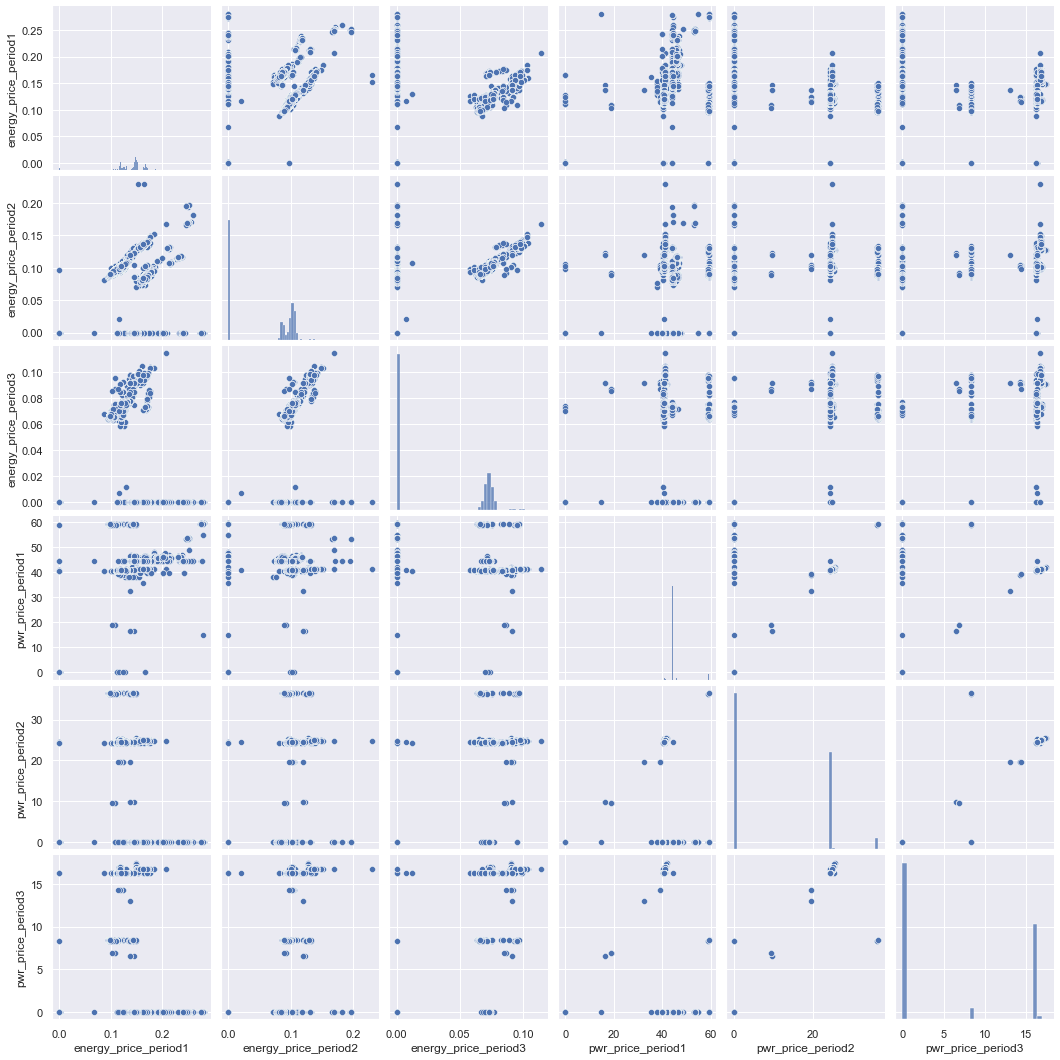

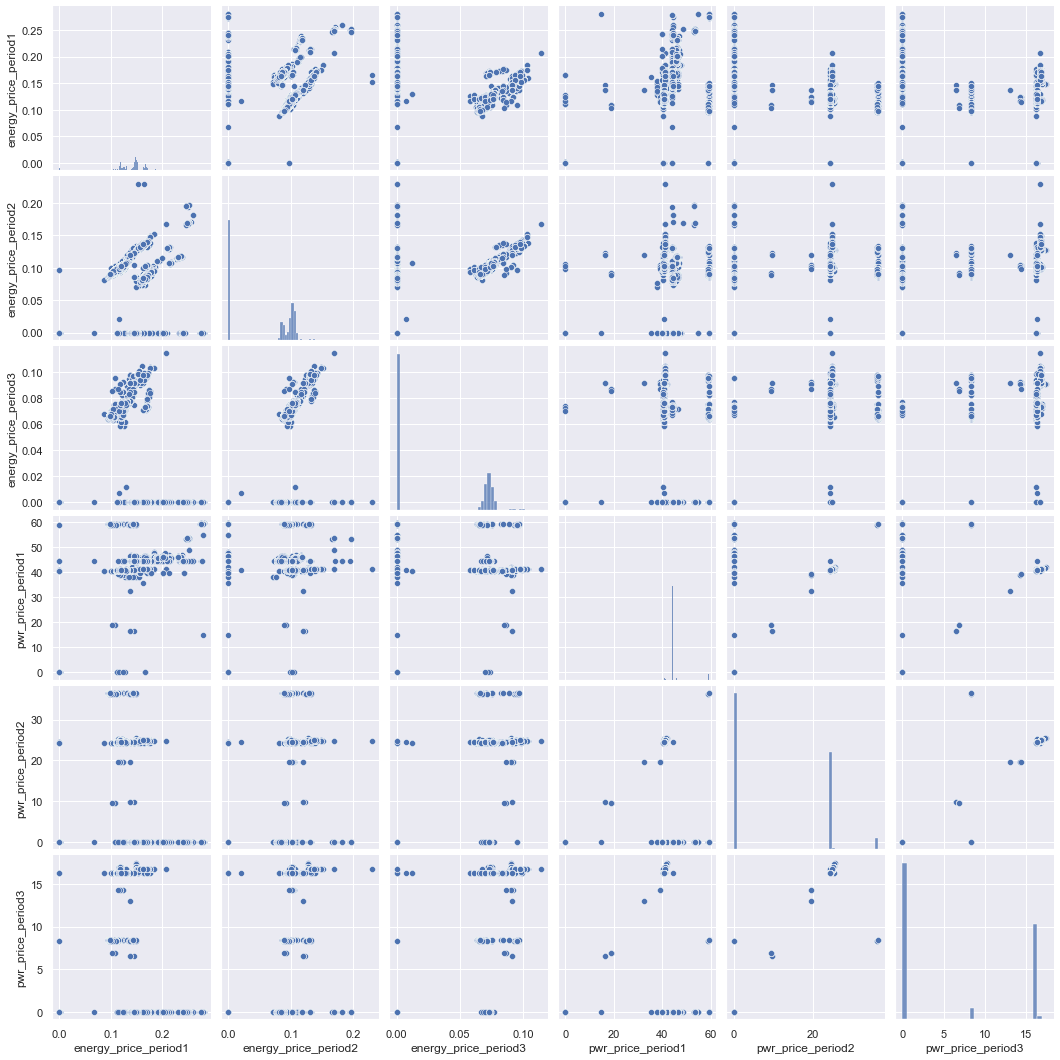

In [71]:
sns.pairplot(price_df);

#### Calculate global churn rate / percentage

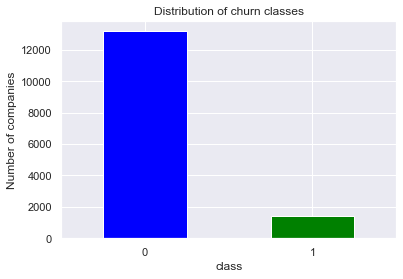

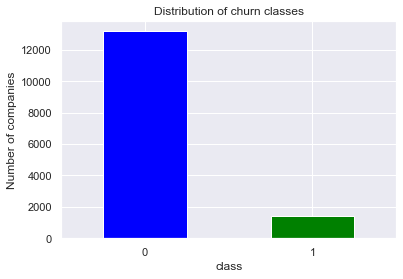

In [72]:
trg_distr = client_df.churn.value_counts()


ax = trg_distr.plot(kind='bar', rot=0, color=['blue', 'green'])
 
# labels for x & y axis
plt.xlabel('class')
plt.ylabel('Number of companies')
 
# title of plot
plt.title('Distribution of churn classes');

In [73]:
trg_distr

0    13187
1     1419
Name: churn, dtype: int64

0    13187
1     1419
Name: churn, dtype: int64

1419 companies have churned and over 13,000 remained.
we can calculate the proportion of churned companies amongst all companies. Since we have only 1s and 0s, we can simply compute the mean to find the proportion (churn rate) 

In [74]:
churn_global_rate = client_df.churn.mean() 
retention_rate = 1 - churn_global_rate 

round (churn_global_rate, 3)

0.097

0.097

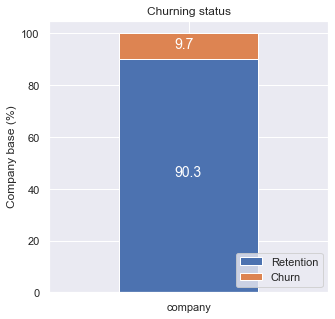

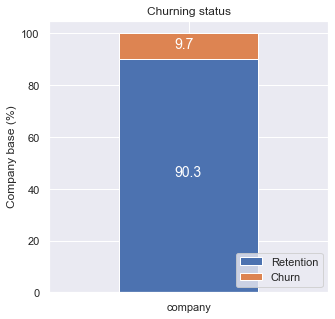

In [75]:
churn = client_df[['company', 'churn']]
churn_global = churn.groupby(churn['churn']).count()
churn_percentage = churn_global / churn_global.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

#### Resolve date cols

In [76]:
# Select columns with date data

date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'] # Series of date col from client

# Convert each selected column to datetime in the original DataFrame

for col in date_cols:
    client_df[col] = pd.to_datetime(client_df[col])

# Check the data types after conversion
print(client_df[date_cols].dtypes)

date_activ         datetime64[ns]
date_end           datetime64[ns]
date_modif_prod    datetime64[ns]
date_renewal       datetime64[ns]
dtype: object
date_activ         datetime64[ns]
date_end           datetime64[ns]
date_modif_prod    datetime64[ns]
date_renewal       datetime64[ns]
dtype: object


In [77]:
from dateutil.relativedelta import relativedelta

date_df = client_df[['date_activ', 'date_end']]

client_df['contract_duration'] = (client_df["date_end"].dt.year) - (date_df["date_activ"].dt.year)
client_df[:3]

,company,sales_channel,cons_elect_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,current_paid_sub,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,customer_no_yrs,elect_campain_code,pow_max,churn,contract_duration
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,6


,company,sales_channel,cons_elect_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,current_paid_sub,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,customer_no_yrs,elect_campain_code,pow_max,churn,contract_duration
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,6


In [78]:
compared = pd.crosstab ( client_df["date_renewal"].dt.year, [client_df["contract_duration"]])
compared

contract_duration,2,3,4,5,6,7,8,9,10,11,12,13
date_renewal,,,,,,,,,,,,
2013,0,0,4,9,3,8,0,1,0,0,0,0
2014,0,17,88,68,48,47,5,0,1,4,0,0
2015,1,1041,3357,2574,3253,2575,74,48,26,177,132,39
2016,0,0,167,252,109,329,76,5,45,10,9,4


contract_duration,2,3,4,5,6,7,8,9,10,11,12,13
date_renewal,,,,,,,,,,,,
2013,0,0,4,9,3,8,0,1,0,0,0,0
2014,0,17,88,68,48,47,5,0,1,4,0,0
2015,1,1041,3357,2574,3253,2575,74,48,26,177,132,39
2016,0,0,167,252,109,329,76,5,45,10,9,4


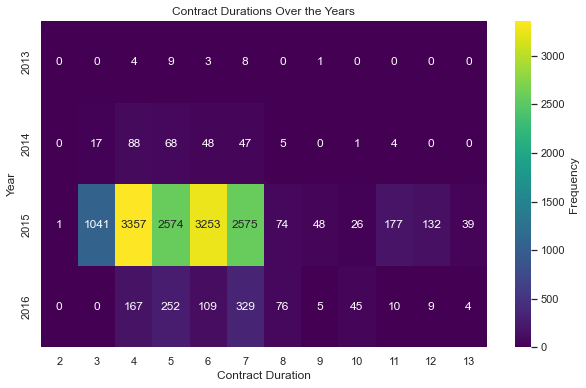

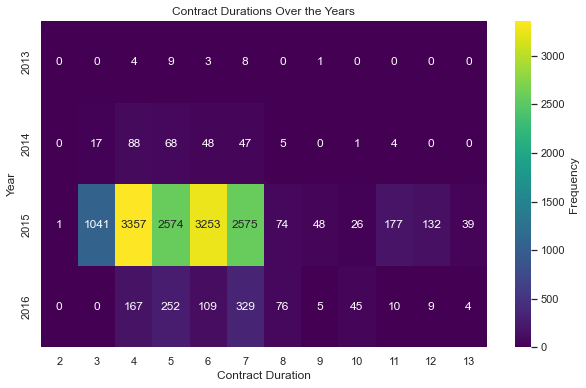

In [79]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.heatmap(compared, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Frequency'})
plt.title('Contract Durations Over the Years')
plt.xlabel('Contract Duration')
plt.ylabel('Year')
plt.show()

The year 2015 holds the highest record of contract renewals.\
Accross all years (2013-2016), companies which has contracts between 3 and 7 years have renewed the most and contributed to the companies income. \
The number of renewals have reduced from the previous year by more than 90%.

In [80]:
compare = pd.crosstab (client_df["churn"], [client_df["contract_duration"]])
compare

contract_duration,2,3,4,5,6,7,8,9,10,11,12,13
churn,,,,,,,,,,,,
0,1,905,3159,2613,3155,2737,146,52,70,181,129,39
1,0,153,457,290,258,222,9,2,2,10,12,4


contract_duration,2,3,4,5,6,7,8,9,10,11,12,13
churn,,,,,,,,,,,,
0,1,905,3159,2613,3155,2737,146,52,70,181,129,39
1,0,153,457,290,258,222,9,2,2,10,12,4


In [81]:
from scipy.stats import chi2_contingency

# Assuming 'data' is your original DataFrame
data = {
    'contract_duration': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'churn_0': [905, 3159, 2613, 3155, 2737, 146, 52, 70, 181, 129, 39],
    'churn_1': [153, 457, 290, 258, 222, 9, 2, 2, 10, 12, 4]
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = df.set_index('contract_duration').T

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Check for significance (using a common significance level of 0.05)
if p < 0.05:
    print("There is a significant difference between contract durations and churn.")
else:
    print("There is no significant difference between contract durations and churn.")


Chi-squared statistic: 110.72407153745921
P-value: 3.8119576140162935e-19
There is a significant difference between contract durations and churn.
Chi-squared statistic: 110.72407153745921
P-value: 3.8119576140162935e-19
There is a significant difference between contract durations and churn.


Interpretation: A meaningful relationship between the contract durations and the likelihood of churn.

The small p-value (< 0.05) implies that there is a significant association between the "contract durations" and "churn" variables. Therefore we can reject the null hypothesis. The observed distribution of contract durations across churn categories is unlikely to have occurred by random chance alone.

### Feauture Importance analysis 
#### calculate rate for all categorical features

In [82]:
# Selecting only cat. columns
cat_dfcols = client_df.select_dtypes(include=['object'])
cat_dfcols.columns

Index(['company', 'sales_channel', 'has_gas', 'elect_campain_code'], dtype='object')

Index(['company', 'sales_channel', 'has_gas', 'elect_campain_code'], dtype='object')

In [83]:
cat_dfcols.nunique()

company               14606
sales_channel             8
has_gas                   2
elect_campain_code        6
dtype: int64

company               14606
sales_channel             8
has_gas                   2
elect_campain_code        6
dtype: int64

In [84]:
cat_dfcols['elect_campain_code'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: elect_campain_code, dtype: int64

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: elect_campain_code, dtype: int64

In [85]:
cat_dfcols['sales_channel'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: sales_channel, dtype: int64

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: sales_channel, dtype: int64

In [86]:
imp_cat_col= cat_dfcols[["sales_channel","has_gas", "elect_campain_code"]]# companies not included

There are 'missing' values included in the no of category for "sales_channel" and "elect_campain_code" which alro represents groups on their own having a lot of records. 

Next, we iterate over all groups within columns in important cat columns to compute their churn rate, the difference between individual group churn rate and global churn rate and also determine the risk of churing for each by dividint the churn rate by the global churn rate. Then, we select groups that have significant risks.

In [87]:
from IPython.display import display

store = pd.DataFrame()


for col in imp_cat_col:
    df_group = client_df.groupby(col)['churn'].mean().reset_index()  # Resetting index for further calculations
    df_group['diff'] = df_group['churn'] - churn_global_rate
    df_group['risk'] = df_group['churn'] / churn_global_rate
    store = store.append(df_group)

    display(df_group)

,sales_channel,churn,diff,risk
0,MISSING,0.075973,-0.021179,0.782004
1,epumfxlbckeskwekxbiuasklxalciiuu,0.000000,-0.097152,0.000000
2,ewpakwlliwisiwduibdlfmalxowmwpci,0.083987,-0.013165,0.864487
3,fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,-0.097152,0.000000
4,foosdfpfkusacimwkcsosbicdxkicaua,0.121410,0.024258,1.249688
5,lmkebamcaaclubfxadlmueccxoimlema,0.055887,-0.041265,0.575256
6,sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,-0.097152,0.000000
7,usilxuppasemubllopkaafesmlibmsdf,0.100364,0.003212,1.033059


,sales_channel,churn,diff,risk
0,MISSING,0.075973,-0.021179,0.782004
1,epumfxlbckeskwekxbiuasklxalciiuu,0.000000,-0.097152,0.000000
2,ewpakwlliwisiwduibdlfmalxowmwpci,0.083987,-0.013165,0.864487
3,fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,-0.097152,0.000000
4,foosdfpfkusacimwkcsosbicdxkicaua,0.121410,0.024258,1.249688
5,lmkebamcaaclubfxadlmueccxoimlema,0.055887,-0.041265,0.575256
6,sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,-0.097152,0.000000
7,usilxuppasemubllopkaafesmlibmsdf,0.100364,0.003212,1.033059


,has_gas,churn,diff,risk
0,f,0.100544,0.003392,1.034913
1,t,0.081856,-0.015296,0.842556


,has_gas,churn,diff,risk
0,f,0.100544,0.003392,1.034913
1,t,0.081856,-0.015296,0.842556


,elect_campain_code,churn,diff,risk
0,MISSING,0.062500,-0.034652,0.643323
1,ewxeelcelemmiwuafmddpobolfuxioce,0.000000,-0.097152,0.000000
2,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.060084,-0.037068,0.618453
3,ldkssxwpmemidmecebumciepifcamkci,0.083863,-0.013289,0.863213
4,lxidpiddsbxsbosboudacockeimpuepw,0.125828,0.028676,1.295166
5,usapbepcfoloekilkwsdiboslwaxobdp,0.000000,-0.097152,0.000000


,elect_campain_code,churn,diff,risk
0,MISSING,0.062500,-0.034652,0.643323
1,ewxeelcelemmiwuafmddpobolfuxioce,0.000000,-0.097152,0.000000
2,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.060084,-0.037068,0.618453
3,ldkssxwpmemidmecebumciepifcamkci,0.083863,-0.013289,0.863213
4,lxidpiddsbxsbosboudacockeimpuepw,0.125828,0.028676,1.295166
5,usapbepcfoloekilkwsdiboslwaxobdp,0.000000,-0.097152,0.000000


A positive difference indicates a higher churn rate in the group compared to the global average, while a negative difference indicates a lower churn rate. It helps you identify which groups have higher or lower churn rates relative to the entire dataset.\

The "risk" column represents the ratio of the group's churn rate to the global churn rate. It provides a measure of how much more (or less) likely a group is to churn compared to the overall dataset.\

elect_campain_code has a group (lxidpiddsbxsbosboudacockeimpuepw) that is at risk of 1.295 of churning. All other groups including the miisng groupd do not contribute to churning being less than 1. companies that do not have gas are more prone to churning (1.035) than companies that do(0.843).A group in channel_ sales (foosdfpfkusacimwkcsosbicdxkicaua)is at 1.250 risk of churning.

data on company market share and comapny size is needed.

### Numerical columns 

In [88]:
# Select columns with numeric data type

numeric_cols = client_df.select_dtypes(include=[np.number])

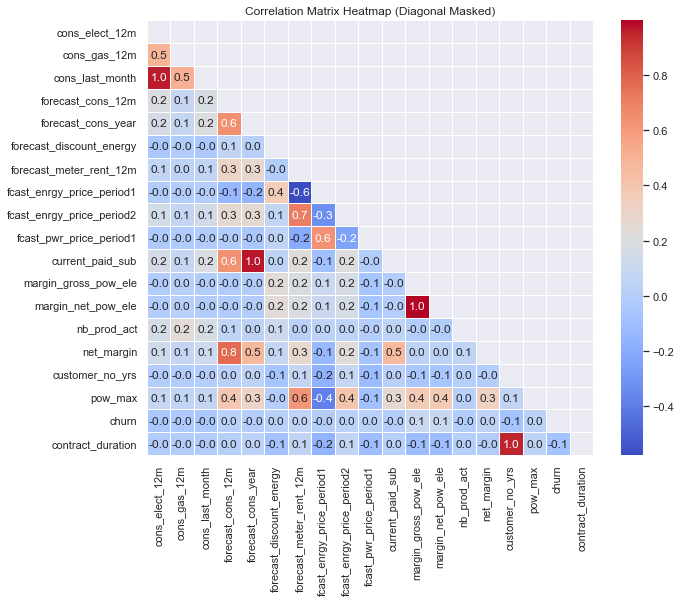

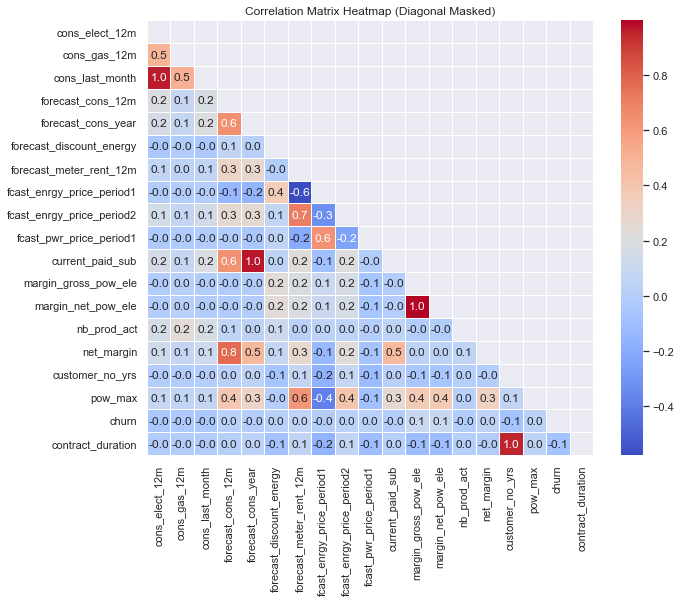

In [89]:
num_cor = numeric_cols.corr()

# view the correlation masked on the upper side to reduce redundancy and confusion
plt.figure(figsize=(10, 8))

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(num_cor, dtype=bool))

# Plot the heatmap with the masked upper triangle
sns.heatmap(num_cor, mask=mask, cmap="coolwarm", annot=True, fmt=".1f", linewidths=.5)

# Customize the plot
plt.title("Correlation Matrix Heatmap (Diagonal Masked)")
plt.show()


No strong relationship can be established with churn and any other feature. This may be due a no of factors. such as:\
**lack of linear relationship;** could be polynomial in nature.\
**interaction effect;** churning might result from interaction between two/more variables.\
**Data Imbalance;** the case here, the churn data is too low to reveal the pattern.

The probability of a company to churn is only 0.097/ only 9.7% of the SME companies are churning. This is clearly an imbalanced data. 92.3%of the companies are not likely to churn.
we can call the plot_stacked_bar function to see the stacked proportion of each class.

In [90]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

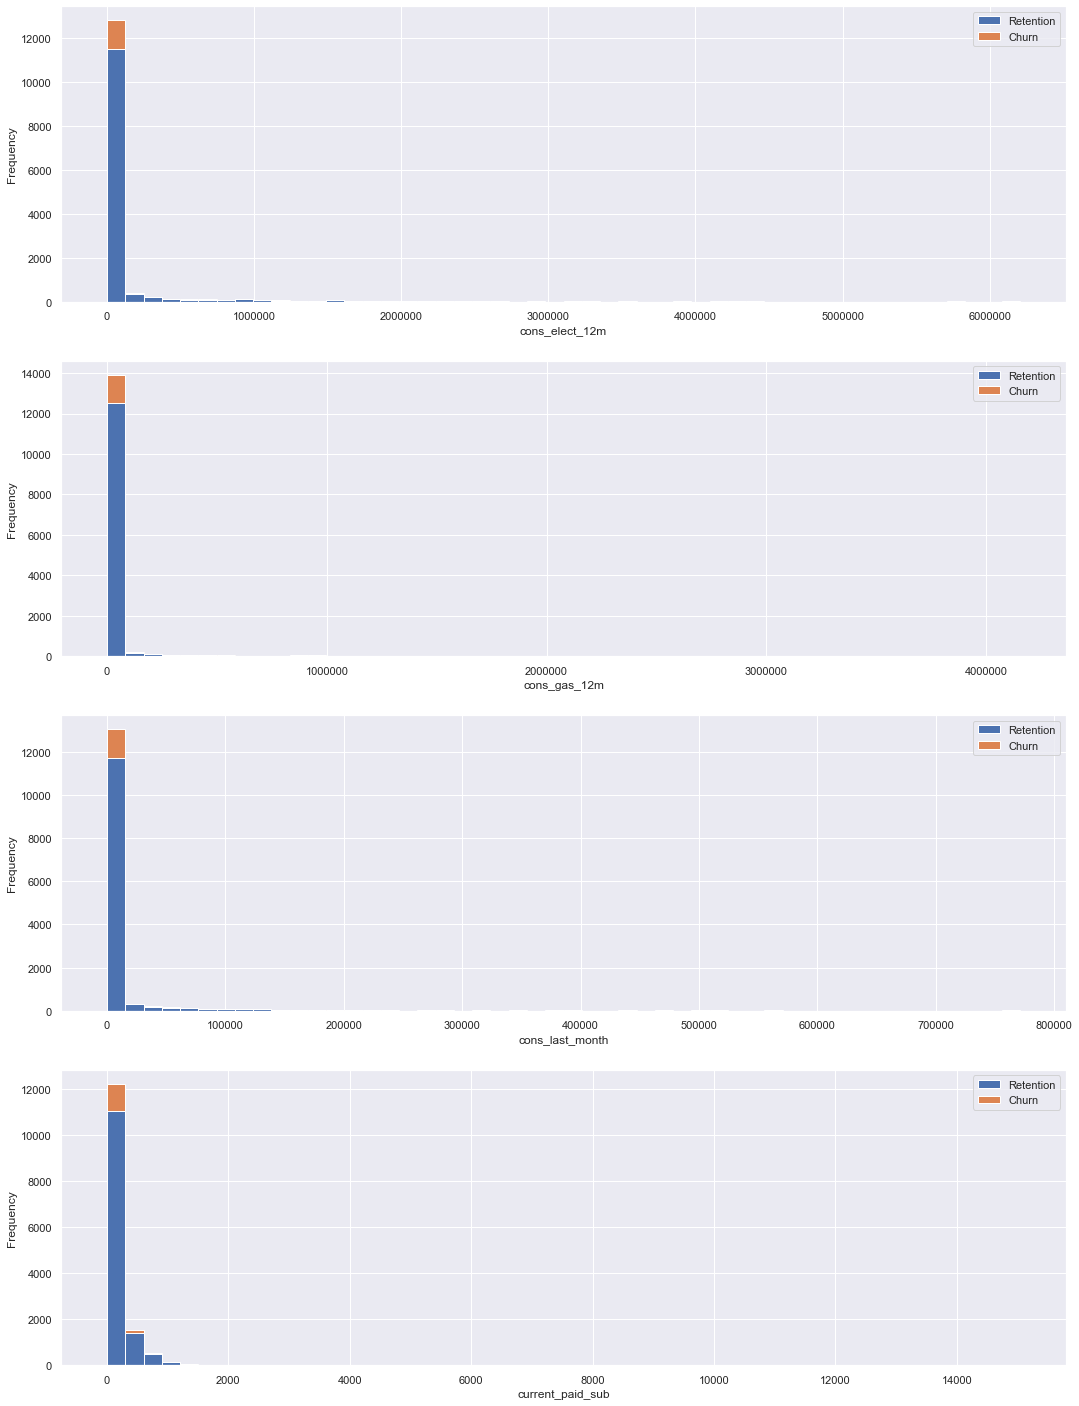

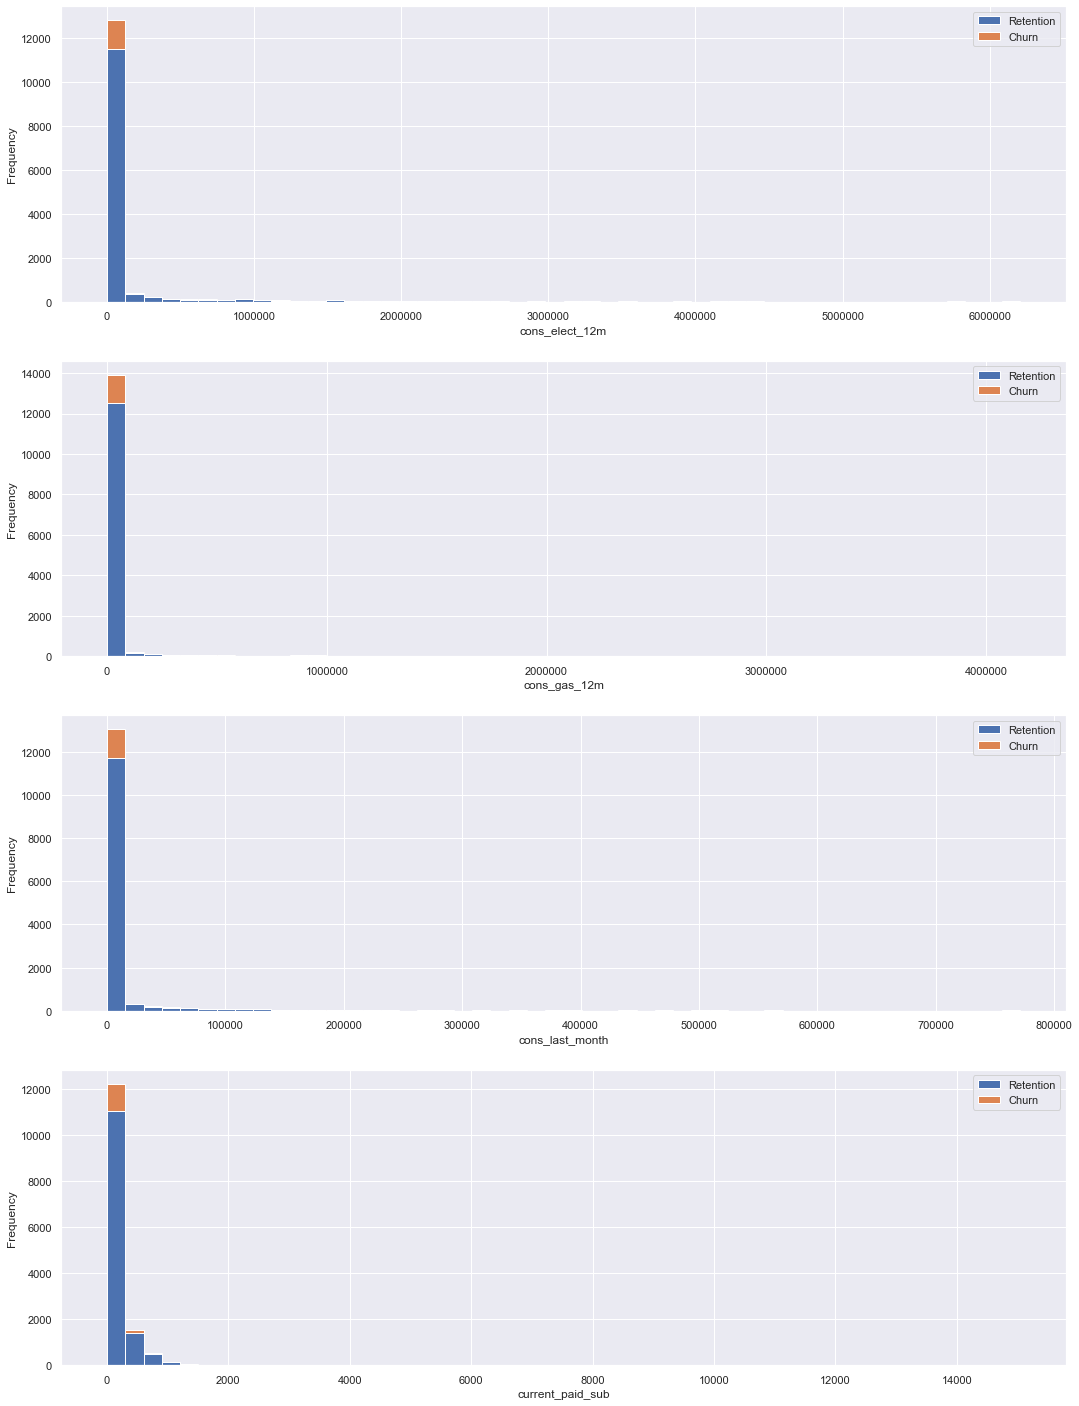

In [91]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(numeric_cols, 'cons_elect_12m', axs[0])
plot_distribution(numeric_cols, 'cons_gas_12m', axs[1])
plot_distribution(numeric_cols, 'cons_last_month', axs[2])
plot_distribution(numeric_cols, 'current_paid_sub', axs[3])

In [92]:
# Merge the datasets
merged_df = pd.merge(client_df, price_df, on='company')
#merged_df

In [93]:
price_df['ref_date'] = pd.to_datetime(price_df["ref_date"])
price_df.dtypes

company                         object
ref_date                datetime64[ns]
energy_price_period1           float64
energy_price_period2           float64
energy_price_period3           float64
pwr_price_period1              float64
pwr_price_period2              float64
pwr_price_period3              float64
dtype: object

company                         object
ref_date                datetime64[ns]
energy_price_period1           float64
energy_price_period2           float64
energy_price_period3           float64
pwr_price_period1              float64
pwr_price_period2              float64
pwr_price_period3              float64
dtype: object

In [94]:
price_df

,company,ref_date,energy_price_period1,energy_price_period2,energy_price_period3,pwr_price_period1,pwr_price_period2,pwr_price_period3
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


,company,ref_date,energy_price_period1,energy_price_period2,energy_price_period3,pwr_price_period1,pwr_price_period2,pwr_price_period3
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [95]:
price_df.groupby(merged_df["churn"])["energy_price_period1","energy_price_period2","energy_price_period3",
                 "pwr_price_period1","pwr_price_period2","pwr_price_period3"].count()

,energy_price_period1,energy_price_period2,energy_price_period3,pwr_price_period1,pwr_price_period2,pwr_price_period3
churn,,,,,,
0.0,158146,158146,158146,158146,158146,158146
1.0,17003,17003,17003,17003,17003,17003


,energy_price_period1,energy_price_period2,energy_price_period3,pwr_price_period1,pwr_price_period2,pwr_price_period3
churn,,,,,,
0.0,158146,158146,158146,158146,158146,158146
1.0,17003,17003,17003,17003,17003,17003


For both energy and power, the prices has been dropping from the first periods through to the third period.\

The churn distribution remained the same across the pricing periods regardless of the falling prices from periods 1-3. 

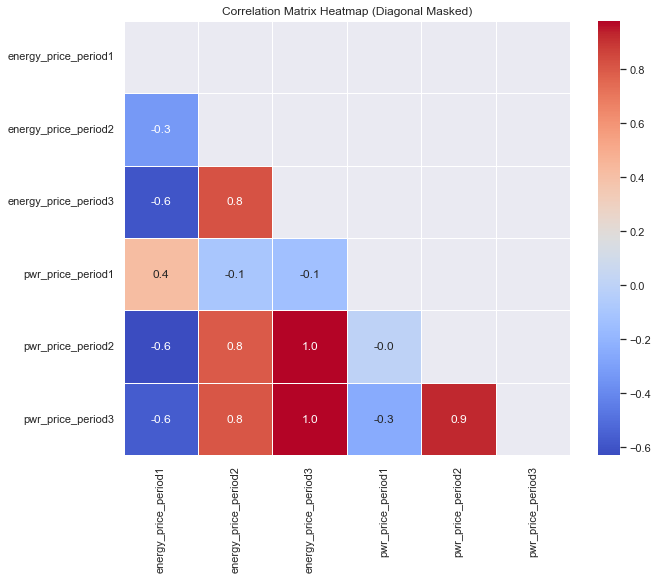

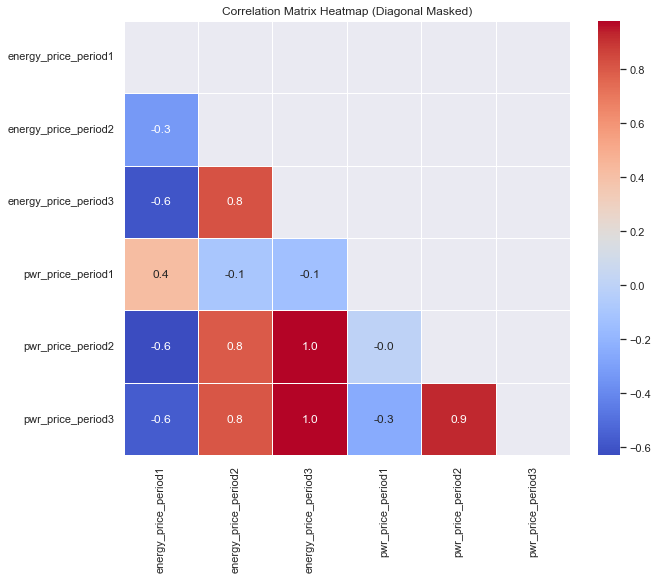

In [96]:
price_cor = price_df.corr()
# view the correlation masked on the upper side to reduce redundancy and confusion
plt.figure(figsize=(10, 8))

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(price_cor, dtype=bool))

# Plot the heatmap with the masked upper triangle
sns.heatmap(price_cor, mask=mask, cmap="coolwarm", annot=True, fmt=".1f", linewidths=.5)

# Customize the plot
plt.title("Correlation Matrix Heatmap (Diagonal Masked)")
plt.show()


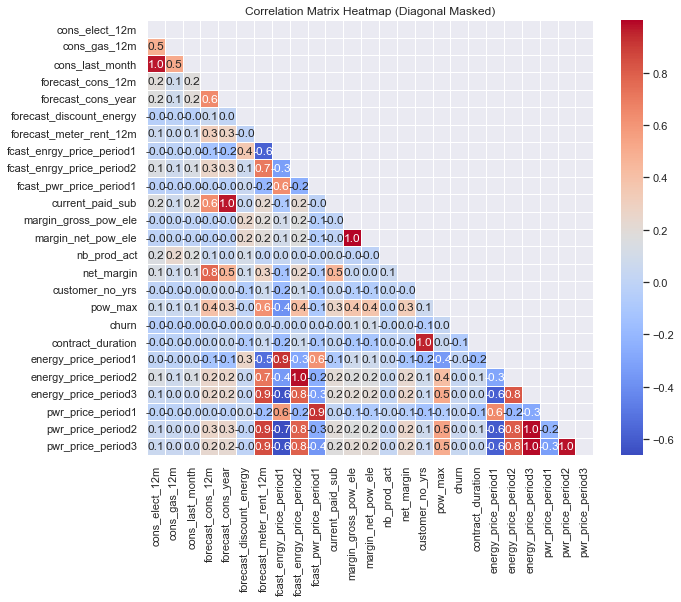

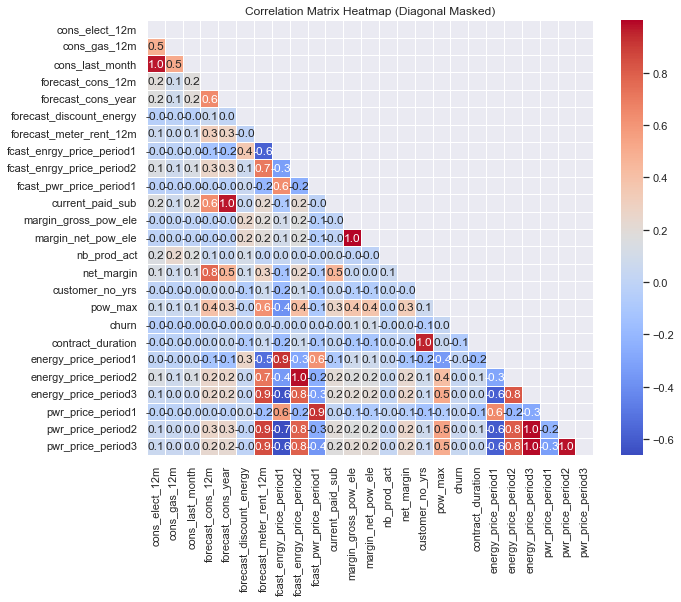

In [97]:
merged_cor = merged_df.corr()
# view the correlation masked on the upper side to reduce redundancy and confusion
plt.figure(figsize=(10, 8))

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(merged_cor, dtype=bool))

# Plot the heatmap with the masked upper triangle
sns.heatmap(merged_cor, mask=mask, cmap="coolwarm", annot=True, fmt=".1f", linewidths=.5)

# Customize the plot
plt.title("Correlation Matrix Heatmap (Diagonal Masked)")
plt.show()


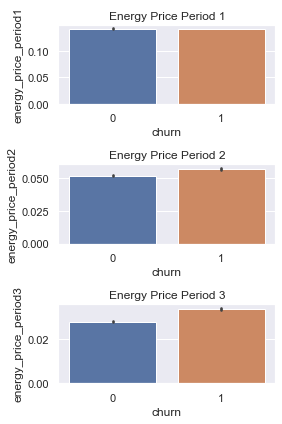

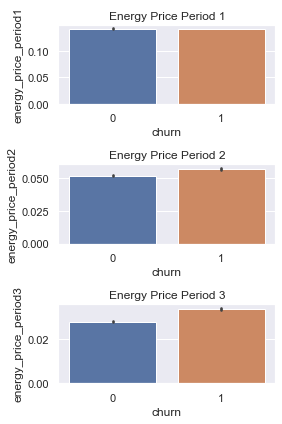

In [98]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 1, figsize=(4, 6))  # 3 rows, 1 column

# Plot each barplot on a different axis
sns.barplot(x='churn', y='energy_price_period1', data=merged_df, ax=axes[0])
sns.barplot(x='churn', y='energy_price_period2', data=merged_df, ax=axes[1])
sns.barplot(x='churn', y='energy_price_period3', data=merged_df, ax=axes[2])

# Optionally, set titles for each subplot
axes[0].set_title('Energy Price Period 1')
axes[1].set_title('Energy Price Period 2')
axes[2].set_title('Energy Price Period 3')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

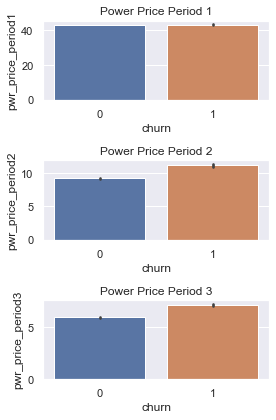

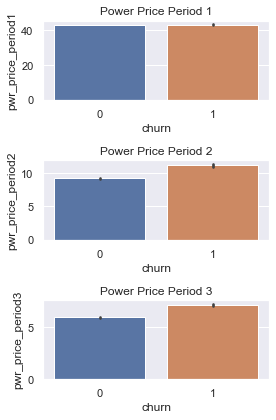

In [99]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 1, figsize=(4, 6))  # 3 rows, 1 column

# Plot each barplot on a different axis
sns.barplot(x='churn', y='pwr_price_period1', data=merged_df, ax=axes[0])
sns.barplot(x='churn', y='pwr_price_period2', data=merged_df, ax=axes[1])
sns.barplot(x='churn', y='pwr_price_period3', data=merged_df, ax=axes[2])

# Optionally, set titles for each subplot
axes[0].set_title('Power Price Period 1')
axes[1].set_title('Power Price Period 2')
axes[2].set_title('Power Price Period 3')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

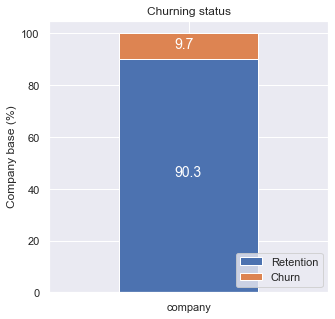

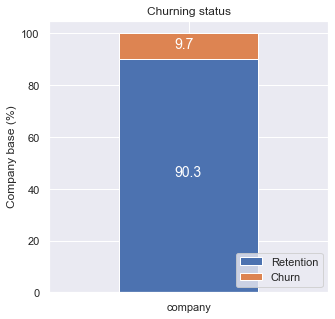

In [100]:
churned_ = merged_df[['company', 'churn']]
churn_glob = churned_.groupby(churned_['churn']).count()
churn_percent = churn_glob / churn_glob.sum() * 100
plot_stacked_bars(churn_percent.transpose(), "Churning status", (5, 5), legend_="lower right")

By adding the price data, no significant chnage occured in the global churn rate 

### Conduct T-Test

In [101]:
from scipy.stats import ttest_ind

churned = merged_df[merged_df['churn'] == 1]['pwr_price_period3']
not_churned = merged_df[merged_df['churn'] == 0]['pwr_price_period3']

# Perform t-test
t_stat, p_val = ttest_ind(churned, not_churned, equal_var=True)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation

alpha = 0.05  # Common threshold for statistical significance
if p_val < alpha:
    print("Statistically significant difference in prices.")
else:
    print("No statistically significant difference in prices.")


T-statistic: 18.619512363593465, P-value: 2.652189560637268e-77
Statistically significant difference in prices.
T-statistic: 18.619512363593465, P-value: 2.652189560637268e-77
Statistically significant difference in prices.


Even though there is significant difference between the mean of the two groups for the selected price period, the distribution of churn remians the same.Price is not a sole driver of churn.

## Machine learning 


In [102]:
features = merged_df[['company', 'sales_channel','cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'fcast_enrgy_price_period1',
       'fcast_pwr_price_period1', 'has_gas', 'current_paid_sub', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin','elect_campain_code', 'pow_max',
       'churn', 'contract_duration', 'energy_price_period1',
       'energy_price_period2', 'energy_price_period3', 'pwr_price_period1']]

target = merged_df['churn']

### Feature encoding

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score,classification_report,confusion_matrix

from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for categorical features before splitting
encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop' removes the first column to avoid multicollinearity
features_encoded = encoder.fit_transform(features[[ 'sales_channel', 'has_gas', 'elect_campain_code']])
encoded_df = pd.DataFrame(features_encoded) 

In [104]:
encoded_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
# Drop the original categorical columns from the features
ml_features = features.drop(['company', 'sales_channel', 'has_gas', 'elect_campain_code', 'churn'], axis=1)
ml_features.columns

Index(['cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'fcast_enrgy_price_period1', 'fcast_pwr_price_period1',
       'current_paid_sub', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin',
       'pow_max', 'contract_duration', 'energy_price_period1',
       'energy_price_period2', 'energy_price_period3', 'pwr_price_period1'],
      dtype='object')

Index(['cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'fcast_enrgy_price_period1', 'fcast_pwr_price_period1',
       'current_paid_sub', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin',
       'pow_max', 'contract_duration', 'energy_price_period1',
       'energy_price_period2', 'energy_price_period3', 'pwr_price_period1'],
      dtype='object')

In [106]:

# Concatenate the encoded features with the rest of the data
ml_features = pd.concat([ml_features.reset_index(drop=True), encoded_df], axis=1)
ml_features.tail()


,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,fcast_enrgy_price_period1,fcast_pwr_price_period1,current_paid_sub,margin_net_pow_ele,nb_prod_act,...,3,4,5,6,7,8,9,10,11,12
175144,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175145,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175146,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175147,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175148,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,fcast_enrgy_price_period1,fcast_pwr_price_period1,current_paid_sub,margin_net_pow_ele,nb_prod_act,...,3,4,5,6,7,8,9,10,11,12
175144,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175145,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175146,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175147,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175148,0,0,762.41,0.0,1.07,0.167086,45.311378,0.0,11.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [107]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ml_features, target, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(class_weight='balanced',random_state=42)

In [108]:
# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use F1 score as the scoring metric for GridSearchCV
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}


In [ ]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scoring, refit='f1', cv=5)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [ ]:

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      1.00      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030

Confusion Matrix:
[[31705     0]
 [    2  3323]]


In [ ]:
pip install  nbconvert[webpdf]